In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
print(df['region'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [5]:
print(df['sex'].value_counts())

male      676
female    662
Name: sex, dtype: int64


In [6]:
print(df['smoker'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder
lencode = LabelEncoder()
lencode.fit(df.sex.drop_duplicates()) 
df.sex = lencode.transform(df.sex)
lencode.fit(df.smoker.drop_duplicates()) 
df.smoker = lencode.transform(df.smoker)
lencode.fit(df.region.drop_duplicates()) 
df.region = lencode.transform(df.region)
df.head

<bound method NDFrame.head of       age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]>

In [8]:
x = df.iloc[:,[0,1,2,3,4,5]]
print(x)
y = df.iloc[:,-1]
print(y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [9]:
from sklearn.decomposition import PCA
pca = PCA()
x = pca.fit_transform(x)
PVE = pca.explained_variance_ratio_
print(PVE)

[8.32853225e-01 1.54306062e-01 6.10966194e-03 4.99679508e-03
 1.05998077e-03 6.74275468e-04]


In [10]:
pca = PCA(n_components = 2)

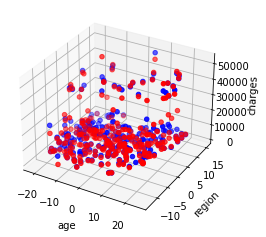

In [11]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2, random_state = 0)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(x_tr, y_tr)
y_pred = regressor.predict(x_te)
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = "3d")
ax.scatter3D(x_te[:,0],x_te[:,1],y_te,c = 'red')
ax.scatter3D(x_te[:,0],x_te[:,1],y_pred,c = 'blue')
ax.set_xlabel('age')
ax.set_ylabel('region')
ax.set_zlabel('charges')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_te,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_te,y_pred)
print(mse)
print(rmse)
print(r2)

18782614.012534544
4333.8913244951755
0.8819668292605196
